In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, u_darrays as uda, u_parallelise as u_par
import datetime
import salem
from salem import get_demo_file, DataLevels, GoogleVisibleMap, Map
import shapely.geometry as shpg
import glob
import pickle as pkl
import os


pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
# to average CP4 data use /GLOBAL/GLOBAL_CP4_create_means.py

In [34]:
out_fut = cnst.lmcs_drive+'CP_models/MCS_files/MODELS/CP4_box_anom/CP4_allHours_future_5000km2_-50_WAf_box_anom_v2/'
out_hist = cnst.lmcs_drive+'CP_models/MCS_files/MODELS/CP4_box_anom/CP4_allHours_historical_5000km2_-50_WAf_box_anom_v2/'

In [35]:
da_hist = xr.open_mfdataset(out_hist + '*-08-*.nc', concat_dim="cases", combine="nested")
da_fut = xr.open_mfdataset(out_fut + '*-08-*.nc', concat_dim="cases", combine="nested")

In [36]:
da_hist = da_hist.load()
da_fut = da_fut.load()

In [4]:
# def read(fdir):
#     dss = []
#     for ff in fdir:
#         try:
#             ds = xr.open_dataset(ff)
#         except:
#             continue
#         dss.append(ds)
#     out = xr.concat(dss, dim='cases')
#     return out

In [ ]:
# files = glob.glob(out_hist + '*.nc')
# hhist = read(files)

In [37]:
da_hist.cases['time.month']

<xarray.DataArray 'month' (cases: 1498)>
array([8, 8, 8, ..., 8, 8, 8])
Coordinates:
    time     (cases) object 1998-08-01 17:29:57.999997 ... 2002-08-30 17:29:5...
Dimensions without coordinates: cases

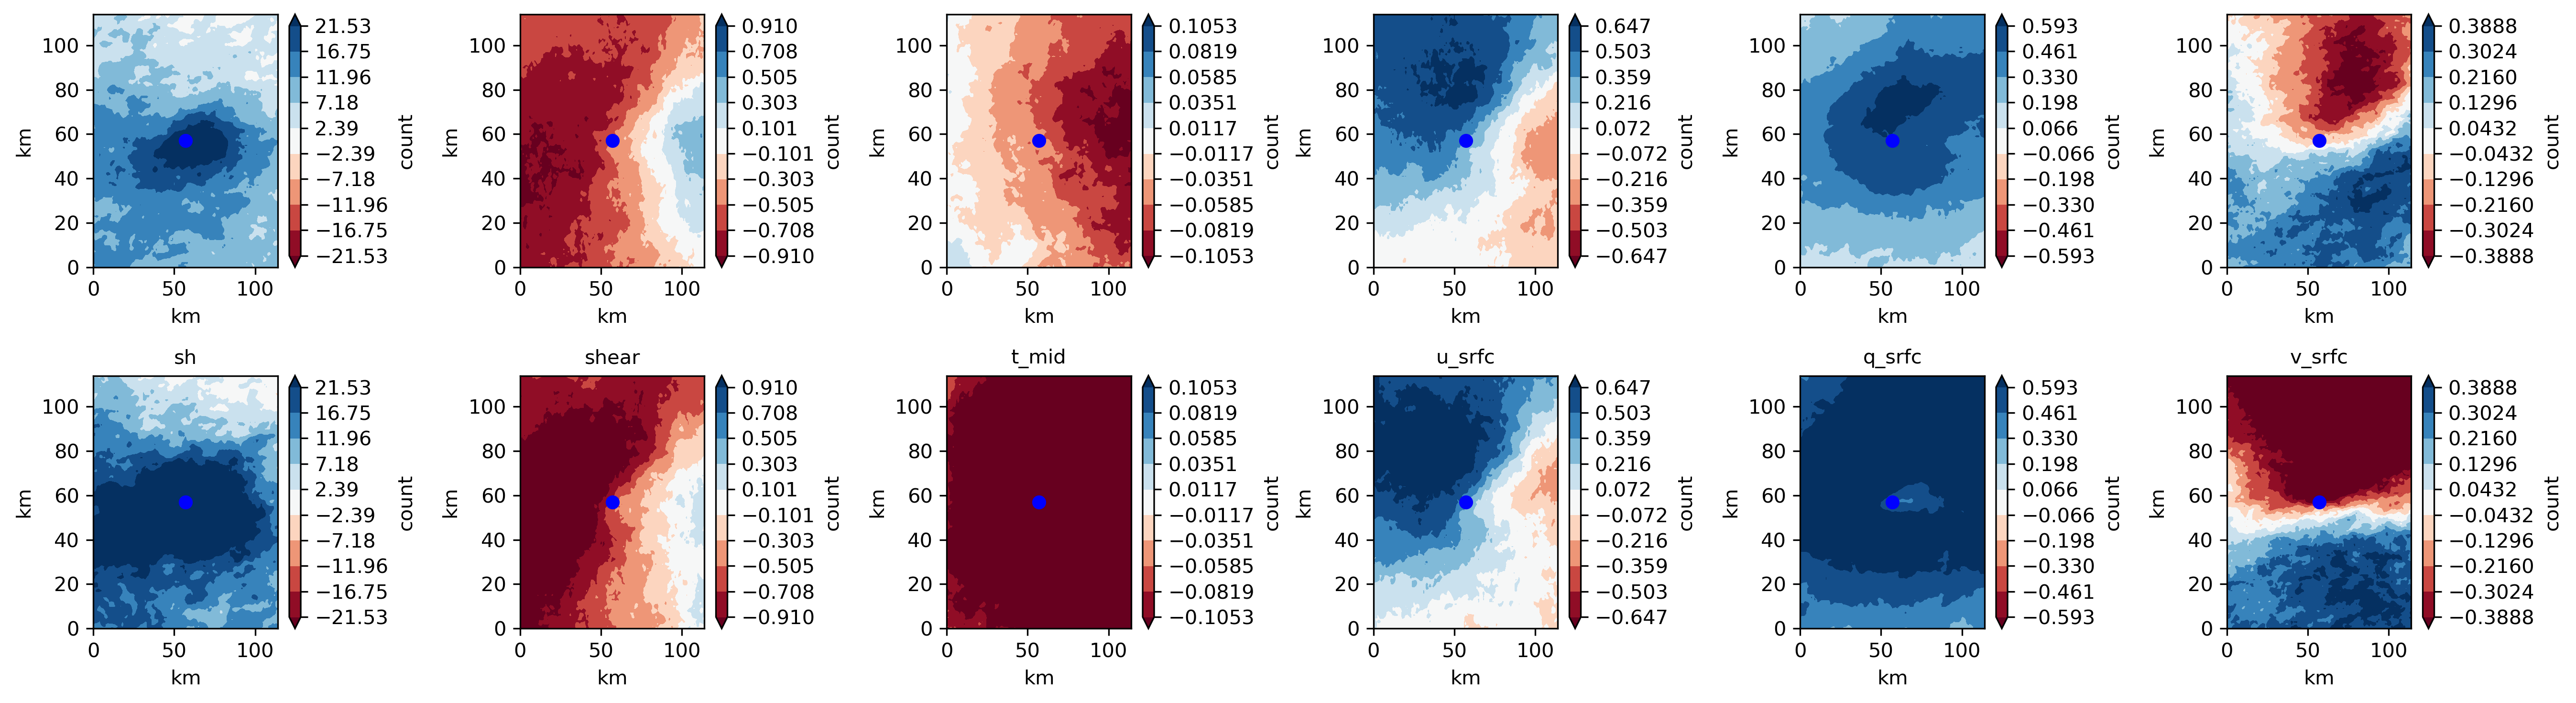

In [40]:
f = plt.figure(figsize=(18,5), dpi=300)
mname = 'node'
extent = 57 #* 4.4
mm = 8

for ix, var in enumerate(['sh', 'shear', 't_mid', 'u_srfc', 'q_srfc', 'v_srfc']):
    
    ax = f.add_subplot(2,6,ix+1)

    ano = da_hist[var].sel(cases=da_hist.cases['time.month']==mm).mean('cases')

    thresh = np.max(np.abs(np.percentile(ano, [5, 95])))

    plt.contourf(ano, cmap='RdBu', levels=np.linspace(thresh * -1, thresh, 10),
                     extend='both')
    
    plt.plot(extent, extent, 'bo')
    #ax.set_xticks((np.linspace(0, 2 * extent, 9)))
    #ax.set_xticklabels(((np.linspace(0, (2 * extent), 9) - extent)*0.25).round(1).astype(float))
    #ax.set_yticks((np.linspace(0, 2 * extent, 9)))
    #ax.set_yticklabels(((np.linspace(0, (2 * extent), 9) - extent)*0.25).round(1).astype(float))
    ax.set_xlabel('km')
    ax.set_ylabel('km')
    #ax.axvline(extent, linestyle='dashed', color='k')
    #ax.axhline(extent, linestyle='dashed', color='k')

#     rect = patches.Rectangle((5.5, 5.5), 11, 11, linewidth=0.5, edgecolor='k', facecolor='none')
#     ax.add_patch(rect)

    plt.colorbar(label='count')
    #plt.title(regs+' day 0 initiations',  fontsize=10)
    
    
    ax = f.add_subplot(2,6,ix+1+6)

    ano = da_fut[var].sel(cases=da_fut.cases['time.month']==mm).mean('cases')#-da_hist[var].sel(cases=da_hist.cases['time.month']==mm).mean('cases')

    #thresh = np.max(np.abs(np.percentile(ano, [5,95])))
    #thresh = np.max(np.abs(np.percentile(ano, [5, 95])))
    plt.contourf(ano, cmap='RdBu', levels=np.linspace(thresh * -1, thresh, 10),
                     extend='both')
    plt.plot(extent, extent, 'bo')
    #ax.set_xticks((np.linspace(0, 2 * extent, 9)))
    #ax.set_xticklabels(((np.linspace(0, (2 * extent), 9) - extent)*0.25).round(1).astype(float))
    #ax.set_yticks((np.linspace(0, 2 * extent, 9)))
    #ax.set_yticklabels(((np.linspace(0, (2 * extent), 9) - extent)*0.25).round(1).astype(float))
    ax.set_xlabel('km')
    ax.set_ylabel('km')
    #ax.axvline(extent, linestyle='dashed', color='k')
    #ax.axhline(extent, linestyle='dashed', color='k')

#     rect = patches.Rectangle((5.5, 5.5), 11, 11, linewidth=0.5, edgecolor='k', facecolor='none')
#     ax.add_patch(rect)

    plt.colorbar(label='count')
    plt.title(var,  fontsize=10)
    
plt.tight_layout()
#f.savefig(cnst.network_data + 'figs/LSTA/corrected_LSTA/new/wavelet_coefficients/2hOverlap/maps.png')